<a href="https://colab.research.google.com/github/TinaSunS/MMA869/blob/Individual/MMA_MMAB_MMAI_2023_869_Individual_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMA/MMAB/MMAI 869 2023: Individual Assignment

Version 1: Updated May 16, 2022

<font color='red'>\# TODO: fill in the below</font>

- Shihan Sun
- [Student number]
- MMA 869
- [Favorite book]
- July 16, 2022

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
print(datetime.datetime.now())

2022-07-21 01:40:17.835252


In [3]:
!which python

/usr/local/bin/python


In [4]:
!python --version

Python 3.7.13


In [5]:
!echo $PYTHONPATH

/env/python


In [1]:
# TODO: install any packages you need to here. For example:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any preprocessing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data 

In [2]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()
col_names = df1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [3]:
X = df1.copy()
X.head(10)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


In [4]:
scaler = StandardScaler()
features = ['Age', 'Income','SpendingScore','Savings']
X[features] = scaler.fit_transform(X[features])

In [5]:
X.shape
X.info()
X.describe().transpose()
X.head(10)
X.tail()

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    float64
 1   Income         505 non-null    float64
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,6.683323e-17,1.000992,-1.742394,-1.037472,-0.000821,1.077295,1.574888
Income,505.0,-2.814031e-17,1.000992,-1.766355,-1.139805,-0.012106,0.878451,1.849048
SpendingScore,505.0,-2.814031e-16,1.000992,-1.947295,-0.772201,-0.527678,1.014725,1.908103
Savings,505.0,-3.939643e-16,1.000992,-2.399206,-1.018085,0.474782,0.846387,1.645835


,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686
5,-1.244802,1.559204,1.318359,-1.684141
6,-0.208151,0.027441,1.079955,-1.007937
7,1.160228,-0.915567,-0.577512,1.258782
8,0.994363,-1.143838,-0.695375,0.590763
9,1.035829,-1.329920,-0.532121,1.216971


,Age,Income,SpendingScore,Savings
500,-1.286268,0.714535,-0.453557,0.621787
501,1.409024,-1.545704,-1.164109,1.235201
502,1.284626,-1.118447,-0.578054,0.855313
503,1.326092,-1.524929,-0.579866,1.322452
504,1.243160,-1.258335,-0.831890,0.510463


## 1.1: Clustering Algorithm #1

In [5]:
# TODO: delete this comment and insert code here. Feel free to add more code cells as appropriate.

In [6]:
Agg = AgglomerativeClustering().fit(X)

Agg_labels=Agg.labels_
metrics.silhouette_score(X, Agg_labels, metric='euclidean')

0.5147611831581517

In [8]:
# Hierarchical (Agglomerative)
Agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agg.fit(X)
Agg_labels=Agg.labels_
metrics.silhouette_score(X, Agg_labels)

AgglomerativeClustering(n_clusters=5)

0.8048976287755765

In [9]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

In [14]:
metrics.silhouette_score(X, Agg_labels)

0.8048976287755765

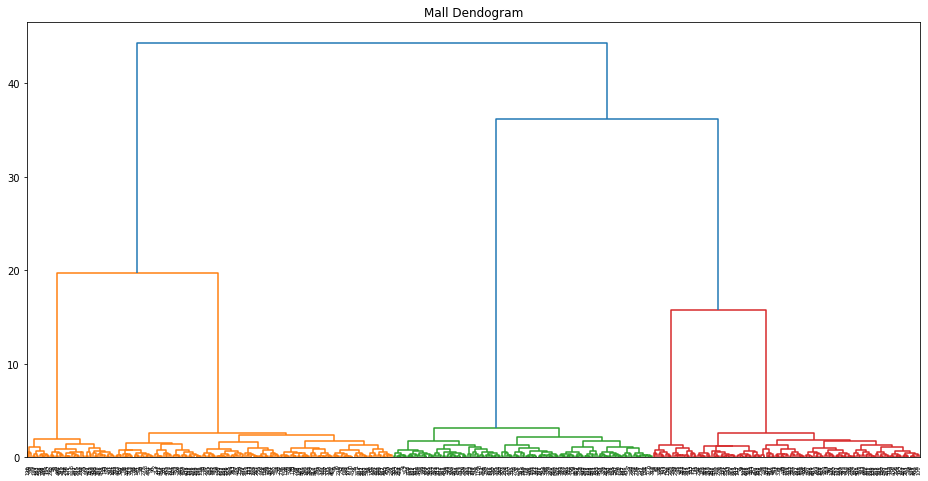

In [10]:
# Plot the dendogram 0 this time with better labels
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Mall Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl); 
#plt.savefig('out/mall_dendro_1.png');

In [11]:
# Let's find K=5 clusters
K=5
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

In [12]:
df1['Cluster ID'] = labels
df1.head(9)

,Age,Income,SpendingScore,Savings,Cluster ID
0,58,77769,0.791329,6559.829923,2
1,59,81799,0.791082,5417.661426,2
2,62,74751,0.702657,9258.992965,2
3,59,74373,0.765680,7346.334504,2
4,87,17760,0.348778,16869.507130,3
5,29,131578,0.847034,3535.514352,1
6,54,76500,0.785198,6878.884249,2
7,87,42592,0.355290,18086.287158,3
8,83,34384,0.324719,14783.379086,3


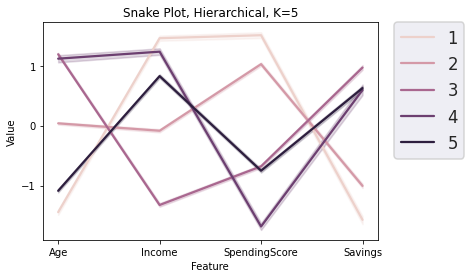

In [13]:
X_df1 = pd.DataFrame(X, columns=col_names)
X_df1['Cluster'] = labels
X_df1.head()

X_df1_melt = pd.melt(X_df1,
    id_vars=['Cluster'],
    value_vars=['Age', 'Income', 'SpendingScore','Savings'],
    var_name='Feature',
    value_name='Value')

plt.title('Snake Plot, Hierarchical, K=5');
sns.set(style="darkgrid")
sns.set_context("talk")
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=X_df1_melt, legend="full");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.savefig('Customer Data.png', transparent=False);

## 1.2: Clustering Algorithm #2

In [15]:
# TODO: delete this comment and insert code here. Feel free to add more code cells as appropriate.
from sklearn.cluster import KMeans
kmeans_model = KMeans().fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.29720761087098785

In [16]:
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(X)

KMeans(n_clusters=5, random_state=42)

In [17]:
k_means.labels_

array([1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 4, 0, 0, 0, 1, 4, 1, 2, 2, 4, 0, 4,
       1, 2, 4, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1,
       1, 3, 4, 3, 0, 1, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 3, 1, 4, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 2, 0, 4, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 2, 4, 3, 1, 0, 2, 1, 1, 3, 1, 3, 1, 4, 1, 2, 1, 0, 2, 1,
       2, 4, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 2, 0, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1,
       1, 1, 4, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 4, 1, 1, 2,
       1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 4, 0, 2,
       2, 0, 4, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [18]:
k_means.cluster_centers_

array([[-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

In [19]:
sample_silhouette_values = silhouette_samples(X, k_means.labels_)

X_tmp = X.copy()
X_tmp['Cluster_ID'] = k_means.labels_

X_tmp['Silhouette'] = sample_silhouette_values
X_tmp = X_tmp.sort_values(['Silhouette'])
X_tmp.head()
X_tmp.tail()

,Age,Income,SpendingScore,Savings,Cluster_ID,Silhouette
196,-1.286268,1.327012,1.419709,-2.275742,3,0.656586
337,-1.742394,1.646975,1.360335,-2.399206,3,0.662592
290,1.160228,-0.795480,-0.757667,0.591929,2,0.673153
80,-0.000821,-0.026067,1.064913,-0.265897,1,0.674761
407,-0.622811,1.088200,-0.755187,0.445998,0,0.674795


,Age,Income,SpendingScore,Savings,Cluster_ID,Silhouette
372,1.201694,-1.471505,-0.571902,0.986563,2,0.867716
464,1.118762,-1.329586,-0.677416,1.065545,2,0.868368
121,1.201694,-1.374445,-0.741044,1.060476,2,0.869548
379,1.243160,-1.397806,-0.706762,0.945914,2,0.872481
335,1.243160,-1.350862,-0.690416,0.949109,2,0.872949


In [20]:
print('Sillouette Score for K: {}'.format(X))
silhouette_score(X, k_means.labels_)

Sillouette Score for K:           Age    Income  SpendingScore   Savings
0   -0.042287  0.062733       1.103593 -1.072467
1   -0.000821  0.174811       1.102641 -1.303473
2    0.123577 -0.021200       0.761727 -0.526556
3   -0.000821 -0.031712       1.004705 -0.913395
4    1.160228 -1.606165      -0.602619  1.012686
..        ...       ...            ...       ...
500 -1.286268  0.714535      -0.453557  0.621787
501  1.409024 -1.545704      -1.164109  1.235201
502  1.284626 -1.118447      -0.578054  0.855313
503  1.326092 -1.524929      -0.579866  1.322452
504  1.243160 -1.258335      -0.831890  0.510463

[505 rows x 4 columns]


0.8048976287755765

In [36]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5,algorithm='auto',n_init=5,max_iter=100).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.6374763664979743

## 1.3 Model Comparison

**Performance:** after tuning Agglomerative and Kmeans all got 0.804.
**Speed:**Since the dataset is not large the speed of both model are very fast. If the sample size is larger, Agglomerative will be slow. 

Kmeans allows us to decided the cluster size and number, but we can only use "eucldean" distance on Kmeans.

Agglomerative allows us to stop at any point to have different number of cluster, that give us more choice to understand the customer from different shapes. and it can apply to different distance.

Conclusion: Agglomerative is better than Kmeans in my opinions.



## 1.4 Personas

Based on Snake Plot, we have 5 different clusters.

Cluster 1 is the group of young people with high income. However they have highest spending score but lowest saving. That indicates this group like to spend all the money they earned and enjoy their life. Uncle Steve can promote expensive jewelry for those people. 

Cluster 2, is an average group with medium age and income. They still like to spend all their money instead of saving the money in bank, but they may not purchase the expensive items, therefore, I recommend Uncle Steve to send them promotion email frequenly, and give them some discount to attract them to purchase. 

Cluster 3 is the people with highest age but lowest income, I believe they are retired people. Their spending score is low compare to first two groups, because they need to save money for their life. I reommend Uncle Steve to promote the low price item to this group and give them greater discount which they can afford.

People in Cluster 4 are also retired people but with higher income, however instead spend money they like to put money in bank or make some investment, therefore, they may not like to purchse jewlry in their daily life. They may not be the target customers, however, I recommend Uncle Steve to send promotion email during holiday like Thanksagiving, Chrismas. They may purchse during the important date.

In cluster 5, the population is also young, they earn an average income, compare to cluster 1,they like to save money instead of spending, therefore, there spending score is lower than savings. They may have the plan for money saving, therefore, attrating them to purchase jewlry may be hard. I suggest Uncle Steve spend less time on this group.

# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

The rule{Eggs} -> {Vagatables} would have high support, since eggs and vagatables are all daily food, there is high chance than customers would purchase them together. People buy eggs may also need vagatables for cooking, therefore, it's high confidents people buy eggs would also by vagatables. Uncle Steve would likely not find this rules interesting, because these iems are very commen, that they would be purchase togerter.

## 2.2: A rule that might have reasonably high support but low confidence.

The rule {Cakes} -> {candles}, they are high support, customer purchase a cake for birthday would also purchas condles. But not high confidence, because customers may purchase cakes may not purchase candles if that day is not a birthday. Uncle Steve would likely not find this rules interesting, since this is commen sense.

## 2.3: A rule that might have low support and low confidence.

The rule {Coffee} -> {Tea}, they are substitute goods. People drink coffee may not drink tea. people drink tea may not drink coffee. therefore, they are low support, and people purchase coffee may not purchase tea at same time, therefore they have low confidence. Uncle Steve would find this rule interesting, he can put them separatly and put all related things together which easy for customer to find. 

## 2.4: A rule that might have low support and high confidence.

The rule {Toothbrush} -> {Milk}, milk is very common food to buy, most people go to grocery store would purchase milk, therefore, people purchase toothbrush have high chance also purchase milk. However, the frequancy of purchase toothbrush is very low, there is a low chance to purchase toothbrush and milk together, therefore, the support of toothbrush and milk is low. Uncle Steve would find this rule not interesting, because these two items are all common daily goods.

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [2]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 3.1: Baseline model

In [4]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.

In [7]:
import pandas as pd
from datetime import datetime, date
  
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
X_train['Age'] = X_train['DateOfBirth'].apply(age)
  
X_train.head()

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth,Age
3897,236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22,52
5628,766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19,58
1756,744-25-5747,F,0,Abigail,Estrada,2,0,3,293 Michael Divide,715 OQT,2470,0,24,East Jill,NewCar,1975-02-17,47
2346,463-78-3098,F,0,Jessica,Jones,2,1,2,02759 Williams Roads,869 SYK,3745,0,30,Lake Debra,UsedCar,1977-02-16,45
2996,414-44-6527,M,0,William,Shaffer,0,1,3,19797 Turner Rue,48-A601,3549,0,36,North Judithbury,Vacation,1976-07-27,45


In [8]:
X_train=X_train.drop(labels=['UserID','FirstName','LastName','LicensePlate','DateOfBirth','Street'],axis=1)

In [9]:
X_train['Married']= X_train['Married'].astype("object")

In [10]:
# Getting the categorical variables
categorical_values = X_train.select_dtypes(include=['object'])
print("Categorical Variables")
print("-------------------------------------------------")
categorical_values.columns

Categorical Variables
-------------------------------------------------


Index(['Sex', 'Married', 'City', 'Purpose'], dtype='object')

In [11]:
# Getting the numeric variables
numeric_values = X_train.select_dtypes(include=['int64'])
print("Numeric Variables")
print("-------------------------------------------------")
numeric_values.columns

Numeric Variables
-------------------------------------------------


Index(['PreviousDefault', 'NumberPets', 'PreviousAccounts',
       'ResidenceDuration', 'Amount', 'Duration', 'Age'],
      dtype='object')

In [12]:
categorical_encoded = pd.get_dummies(categorical_values, drop_first=True)

In [13]:
categorical_encoded.dtypes

Sex_M                    uint8
Married_1                uint8
City_East Jessetown      uint8
City_East Jill           uint8
City_Ericmouth           uint8
City_Herrerafurt         uint8
City_Jacquelineland      uint8
City_Lake Chad           uint8
City_Lake Debra          uint8
City_Lake Roberto        uint8
City_Lisatown            uint8
City_New Jessica         uint8
City_New Kellystad       uint8
City_New Roberttown      uint8
City_North Judithbury    uint8
City_North Noahstad      uint8
City_Port Jesseville     uint8
City_Port Keith          uint8
City_Ramirezstad         uint8
City_Robinsonshire       uint8
City_West Michael        uint8
Purpose_Education        uint8
Purpose_Household        uint8
Purpose_NewCar           uint8
Purpose_Other            uint8
Purpose_Repair           uint8
Purpose_UsedCar          uint8
Purpose_Vacation         uint8
dtype: object

In [14]:
X_train=pd.concat([numeric_values, categorical_encoded], axis=1)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
Clf = DecisionTreeClassifier(random_state=0)
print(cross_val_score(Clf, X_train, y_train, cv=5,scoring= 'f1_micro'))

[0.82708333 0.8375     0.853125   0.84895833 0.84895833]


In [11]:
X_train.head()

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Sex_M,Street_000 Sabrina Skyway Apt. 073,Street_000 Solomon Ports Suite 381,...,DateOfBirth_1991-05-29,DateOfBirth_1991-09-16,DateOfBirth_1991-09-24,DateOfBirth_1991-11-18,DateOfBirth_1992-03-06,DateOfBirth_1992-07-14,DateOfBirth_1993-04-28,DateOfBirth_1993-08-23,DateOfBirth_1993-09-12,DateOfBirth_1994-07-28
3897,0,2,0,2,3329,0,12,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5628,0,0,2,2,2996,0,36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1756,0,2,0,3,2470,0,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2346,0,2,1,2,3745,0,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,1,3,3549,0,36,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.2: Feature engineering

In [ ]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.

In [16]:
def plot_hist(feature, title):
    plt.figure(figsize=(8, 5));
    plt.hist(feature, bins=20, edgecolor='black', linewidth=1.2);
    plt.title(title, fontsize=20);
    #ax.tick_params(axis='both', which='major', labelsize=18);
    plt.grid(True);

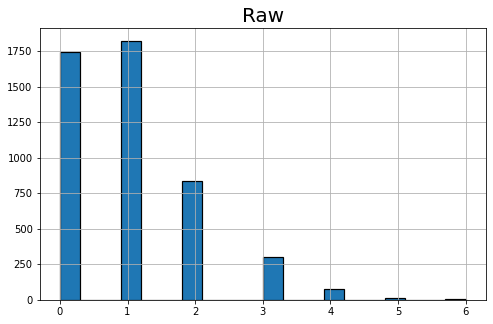

In [17]:
plot_hist(X_train['PreviousAccounts'], "Raw");

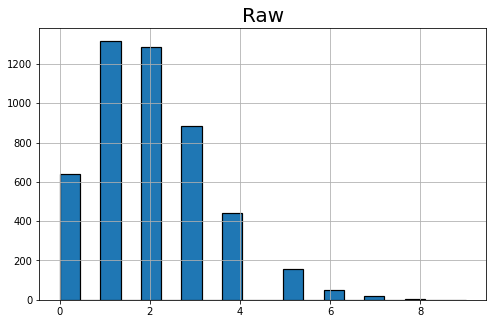

In [18]:
plot_hist(X_train['ResidenceDuration'], "Raw");

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[['ResidenceDuration']])

X_train['ResidenceDuration_Std'] = scaler.transform(X_train[['ResidenceDuration']])  

StandardScaler()

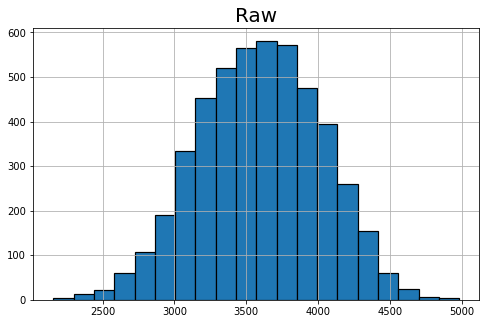

In [20]:
plot_hist(X_train['Amount'], "Raw");

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[['Amount']])

X_train['Amount_MinMax'] = scaler.transform(X_train[['Amount']])   

MinMaxScaler()

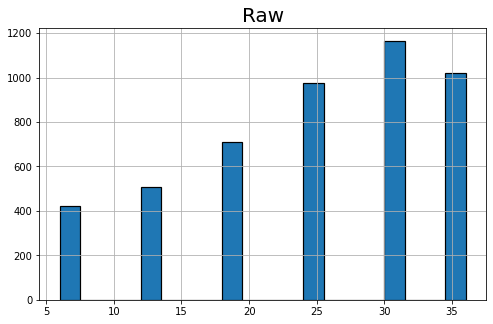

In [30]:
plot_hist(X_train['Duration'], "Raw");

In [22]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='box-cox')
scaler.fit(X_train[['Duration']])
X_train['Duration_BoxCox'] = scaler.transform(X_train[['Duration']])  

PowerTransformer(method='box-cox')

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
Clf = DecisionTreeClassifier(random_state=0)
print(cross_val_score(Clf, X_train, y_train, cv=5,scoring= 'f1_micro'))

[0.825      0.85104167 0.85       0.85       0.84479167]


## 3.3: Feature selection

In [ ]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.

In [27]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_train_new=selector.fit_transform(X_train)
X_train_new.shape

(4800, 38)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
Clf = DecisionTreeClassifier(random_state=0)
print(cross_val_score(Clf, X_train_new, y_train, cv=5,scoring= 'f1_micro'))

[0.825      0.85104167 0.85       0.85       0.84479167]


In [26]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)
selector.support_
selector.ranking_

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False])

array([ 1, 29, 24, 23, 30, 22,  8, 21,  1, 15, 18, 19, 26, 34,  6,  9, 14,
       11, 27, 20, 17, 12, 25,  7,  1, 32, 10, 16, 31,  5,  1,  1,  4,  3,
        2, 28, 33, 13])

In [38]:
X_train_new = selector.transform(X_train)


X_train_new.shape


(4800, 5)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
Clf = DecisionTreeClassifier(random_state=0)
print(cross_val_score(Clf, X_train_new, y_train, cv=5,scoring= 'f1_micro'))

[0.82916667 0.828125   0.82916667 0.82916667 0.828125  ]


## 3.4: Hyperparameter tuning

In [ ]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.

In [28]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf1 = GridSearchCV(svc, parameters)
clf1.fit(X_train, y_train)
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf1.cv_results_.keys())


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [82]:
cv_results = pd.DataFrame(clf1.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[
    [
        'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
    ]
].head(5)

,mean_score_time,mean_test_score,param_C,param_kernel,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
0,0.033182,0.828750,1,linear,"{'C': 1, 'kernel': 'linear'}",1,0.818750,0.825000,0.840625,0.847917,0.811458,2.790307,0.008640,0.013575
1,0.180296,0.828333,1,rbf,"{'C': 1, 'kernel': 'rbf'}",2,0.829167,0.828125,0.828125,0.828125,0.828125,0.052008,0.005133,0.000417
3,0.114379,0.828333,10,rbf,"{'C': 10, 'kernel': 'rbf'}",2,0.829167,0.828125,0.828125,0.828125,0.828125,0.046270,0.004284,0.000417
2,0.032850,0.825000,10,linear,"{'C': 10, 'kernel': 'linear'}",4,0.817708,0.833333,0.808333,0.853125,0.812500,0.864365,0.008247,0.016417


In [79]:

print(cross_val_score(clf1, X_train_new, y_train, cv=5,scoring= 'f1_micro'))

[0.82916667 0.828125   0.828125   0.828125   0.828125  ]


## 3.5: Performance estimation

In [83]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.
X_test=X_test.drop(labels=['UserID','FirstName','LastName','LicensePlate','DateOfBirth','Street'],axis=1)

In [86]:
X_test['Married']= X_test['Married'].astype("object")

In [87]:
categorical_values_t = X_test.select_dtypes(include=['object'])
print("Categorical Variables")
print("-------------------------------------------------")
categorical_values.columns

Categorical Variables
-------------------------------------------------


Index(['Sex', 'Married', 'City', 'Purpose'], dtype='object')

In [88]:
numeric_values_t = X_test.select_dtypes(include=['int64'])
print("Numeric Variables")
print("-------------------------------------------------")
numeric_values.columns

Numeric Variables
-------------------------------------------------


Index(['PreviousDefault', 'NumberPets', 'PreviousAccounts',
       'ResidenceDuration', 'Amount', 'Duration'],
      dtype='object')

In [89]:
categorical_encoded_t = pd.get_dummies(categorical_values_t, drop_first=True)

In [90]:
categorical_encoded_t.dtypes

Sex_M                    uint8
Married_1                uint8
City_East Jessetown      uint8
City_East Jill           uint8
City_Ericmouth           uint8
City_Herrerafurt         uint8
City_Jacquelineland      uint8
City_Lake Chad           uint8
City_Lake Debra          uint8
City_Lake Roberto        uint8
City_Lisatown            uint8
City_New Jessica         uint8
City_New Kellystad       uint8
City_New Roberttown      uint8
City_North Judithbury    uint8
City_North Noahstad      uint8
City_Port Jesseville     uint8
City_Port Keith          uint8
City_Ramirezstad         uint8
City_Robinsonshire       uint8
City_West Michael        uint8
Purpose_Education        uint8
Purpose_Household        uint8
Purpose_NewCar           uint8
Purpose_Other            uint8
Purpose_Repair           uint8
Purpose_UsedCar          uint8
Purpose_Vacation         uint8
dtype: object

In [91]:
X_test=pd.concat([numeric_values_t, categorical_encoded_t], axis=1)

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_test[['ResidenceDuration']])

X_test['ResidenceDuration_Std'] = scaler.transform(X_test[['ResidenceDuration']])  

StandardScaler()

In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_test[['Amount']])

X_test['Amount_MinMax'] = scaler.transform(X_test[['Amount']])   

MinMaxScaler()

In [94]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='box-cox')
scaler.fit(X_test[['Duration']])
X_test['Duration_BoxCox'] = scaler.transform(X_test[['Duration']])  

PowerTransformer(method='box-cox')

In [98]:
X_test_new = selector.transform(X_test)


X_test_new.shape

(1200, 5)

In [103]:
from sklearn.metrics import f1_score

clf1.fit(X_train_new, y_train)

y_pred = clf1.predict(X_test_new)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [104]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90       991
           1       0.00      0.00      0.00       209

    accuracy                           0.82      1200
   macro avg       0.41      0.50      0.45      1200
weighted avg       0.68      0.82      0.75      1200



# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



The actual fail turbines is 256, and the cost is 20,000 to repair each turbine. Total cost without any predictive maintainenanc models is 5,120,000.

**With the perdictive models cost:**

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 2,500 | 20,000 |
| **Actual No Fail**   | 500 | 0 |

**With the RNN perdictive models cost:**

predict and actual fail: 226*2,500 = 565,000

predict fail actual no fail: 1,200*500 = 600,000

predict no fail actual fail: 30*20,000 = 600,000

predict and actual no fail: 254045*0 = 0

**Total cost:**

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 565,000| 600,000 |
| **Actual No Fail**   | 600,000| 0 |
| **Total**            ||1,765,000|. 

**With the Random forest perdictive models cost:**

predict and actual fail: 201*2,500 = 502,500

predict fail actual no fail: 50*500 = 25,000

predict no fail actual fail: 55*20,000 = 1,100,000

predict and actual no fail: 255195*0 = 0

**Total cost:**

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 502,500| 1,100,000 |
| **Actual No Fail**   | 25,000| 0 |
| **Total**            ||1,627,500|. 

According to our calculation, Random forest models has lower cost, which can save more money for Uncle Steve. I recommed random forest models.